<a href="https://colab.research.google.com/github/Rad-Monk/Code/blob/main/LP_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf

SHUFFLE_BUFFER = 500
BATCH_SIZE = 2

In [ ]:
csv_file = tf.keras.utils.get_file('heart.csv', 'https://storage.googleapis.com/download.tensorflow.org/data/heart.csv')

13273/13273 [==============================] - 0s 0us/step


In [ ]:
df = pd.read_csv(csv_file)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal         object
target        int64
dtype: object

In [ ]:
target = df.pop('target')

In [ ]:
numeric_features_names = ['age', 'trestbps','chol','thalach','oldpeak']


In [ ]:
numeric_features = ['age', 'trestbps','chol','thalach','oldpeak']
numeric_features = df[numeric_features]
numeric_features.head()


,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,67,160,286,108,1.5
2,67,120,229,129,2.6
3,37,130,250,187,3.5
4,41,130,204,172,1.4


In [ ]:
tf.convert_to_tensor(numeric_features)

<tf.Tensor: shape=(303, 5), dtype=float64, numpy=
array([[ 63. , 145. , 233. , 150. ,   2.3],
       [ 67. , 160. , 286. , 108. ,   1.5],
       [ 67. , 120. , 229. , 129. ,   2.6],
       ...,
       [ 65. , 135. , 254. , 127. ,   2.8],
       [ 48. , 130. , 256. , 150. ,   0. ],
       [ 63. , 150. , 407. , 154. ,   4. ]])>

In [ ]:
normalizer = tf.keras.layers.Normalization(axis = -1)
normalizer.adapt(numeric_features)

In [ ]:
normalizer(numeric_features.iloc[:3])

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[ 0.93383914,  0.74578077, -0.2600867 ,  0.03480718,  1.0680453 ],
       [ 1.3782105 ,  1.5923285 ,  0.7573879 , -1.7806165 ,  0.38022864],
       [ 1.3782105 , -0.6651321 , -0.3368772 , -0.87290466,  1.3259765 ]],
      dtype=float32)>

In [ ]:
def get_basic_model():
  model = tf.keras.Sequential([
      normalizer,
      tf.keras.layers.Dense(128, activation = 'relu'),
      tf.keras.layers.Dense(128, activation = 'relu'),
      tf.keras.layers.Dense(1)
  ])

  model.compile(
      optimizer = 'adam',
      loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
      metrics = ['accuracy']
                )

  return model

In [ ]:
model = get_basic_model()
model.fit(numeric_features, target, epochs = 15, batch_size = BATCH_SIZE)

Epoch 1/15
152/152 [==============================] - 1s 2ms/step - loss: 0.4864 - accuracy: 0.7525
Epoch 2/15
152/152 [==============================] - 0s 2ms/step - loss: 0.4532 - accuracy: 0.7822
Epoch 3/15
152/152 [==============================] - 0s 2ms/step - loss: 0.4355 - accuracy: 0.7921
Epoch 4/15
152/152 [==============================] - 0s 2ms/step - loss: 0.4337 - accuracy: 0.7888
Epoch 5/15
152/152 [==============================] - 0s 2ms/step - loss: 0.4302 - accuracy: 0.7921
Epoch 6/15
152/152 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.7954
Epoch 7/15
152/152 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8152
Epoch 8/15
152/152 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8185
Epoch 9/15
152/152 [==============================] - 0s 2ms/step - loss: 0.4081 - accuracy: 0.7855
Epoch 10/15
152/152 [==============================] - 0s 2ms/step - loss: 0.3937 - accuracy: 0.7987

In [ ]:
numeric_data = tf.data.Dataset.from_tensor_slices((numeric_features, target))
numeric_data = numeric_data.shuffle(SHUFFLE_BUFFER).batch(BATCH_SIZE)

In [ ]:
model = get_basic_model()
model.fit(numeric_data, epochs = 15)

Epoch 1/15
152/152 [==============================] - 1s 2ms/step - loss: 0.5202 - accuracy: 0.7426
Epoch 2/15
152/152 [==============================] - 0s 2ms/step - loss: 0.4479 - accuracy: 0.7921
Epoch 3/15
152/152 [==============================] - 0s 2ms/step - loss: 0.4383 - accuracy: 0.7690
Epoch 4/15
152/152 [==============================] - 0s 2ms/step - loss: 0.4322 - accuracy: 0.7822
Epoch 5/15
152/152 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.7987
Epoch 6/15
152/152 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.7888
Epoch 7/15
152/152 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.7987
Epoch 8/15
152/152 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.8053
Epoch 9/15
152/152 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.7987
Epoch 10/15
152/152 [==============================] - 0s 2ms/step - loss: 0.4057 - accuracy: 0.8086

In [ ]:
numeric_data_ds = tf.data.Dataset.from_tensor_slices((dict(numeric_features), target))
for row in numeric_data_ds.take(3):
  print(row)

({'age': <tf.Tensor: shape=(), dtype=int64, numpy=63>, 'trestbps': <tf.Tensor: shape=(), dtype=int64, numpy=145>, 'chol': <tf.Tensor: shape=(), dtype=int64, numpy=233>, 'thalach': <tf.Tensor: shape=(), dtype=int64, numpy=150>, 'oldpeak': <tf.Tensor: shape=(), dtype=float64, numpy=2.3>}, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
({'age': <tf.Tensor: shape=(), dtype=int64, numpy=67>, 'trestbps': <tf.Tensor: shape=(), dtype=int64, numpy=160>, 'chol': <tf.Tensor: shape=(), dtype=int64, numpy=286>, 'thalach': <tf.Tensor: shape=(), dtype=int64, numpy=108>, 'oldpeak': <tf.Tensor: shape=(), dtype=float64, numpy=1.5>}, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
({'age': <tf.Tensor: shape=(), dtype=int64, numpy=67>, 'trestbps': <tf.Tensor: shape=(), dtype=int64, numpy=120>, 'chol': <tf.Tensor: shape=(), dtype=int64, numpy=229>, 'thalach': <tf.Tensor: shape=(), dtype=int64, numpy=129>, 'oldpeak': <tf.Tensor: shape=(), dtype=float64, numpy=2.6>}, <tf.Tensor: shape=(), dtype=int64, numpy=0>)


In [ ]:
def stack_dict(inputs, fun=tf.stack):
  values = []
  for key in sorted(inputs.keys()):
    values.append(tf.cast(inputs[key], tf.float32))
  return fun(values,axis = -1)

In [ ]:
class MyModel(tf.keras.Model):
  def __init__(self):
    # Create all the internal layers in init.
    super().__init__()

    self.normalizer = tf.keras.layers.Normalization(axis=-1)

    self.seq = tf.keras.Sequential([
      self.normalizer,
      tf.keras.layers.Dense(10, activation='relu'),
      tf.keras.layers.Dense(10, activation='relu'),
      tf.keras.layers.Dense(1)
    ])

  def adapt(self, inputs):
    # Stack the inputs and `adapt` the normalization layer.
    inputs = stack_dict(inputs)
    self.normalizer.adapt(inputs)

  def call(self, inputs):
    # Stack the inputs
    inputs = stack_dict(inputs)
    # Run them through all the layers.
    result = self.seq(inputs)

    return result

model = MyModel()

model.adapt(dict(numeric_features))

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'],
              run_eagerly=True)

In [ ]:
model.fit(dict(numeric_features), target, epochs =5, batch_size = BATCH_SIZE)

Epoch 1/5
152/152 [==============================] - 5s 35ms/step - loss: 0.6271 - accuracy: 0.7261
Epoch 2/5
152/152 [==============================] - 6s 41ms/step - loss: 0.5507 - accuracy: 0.7261
Epoch 3/5
152/152 [==============================] - 5s 35ms/step - loss: 0.5052 - accuracy: 0.7261
Epoch 4/5
152/152 [==============================] - 6s 40ms/step - loss: 0.4833 - accuracy: 0.7261
Epoch 5/5
152/152 [==============================] - 5s 35ms/step - loss: 0.4692 - accuracy: 0.7261


In [ ]:
numeric_dict_batches = numeric_data_ds.shuffle(SHUFFLE_BUFFER).batch(BATCH_SIZE)
model.fit(numeric_dict_batches, epochs = 5)

Epoch 1/5
152/152 [==============================] - 5s 35ms/step - loss: 0.4590 - accuracy: 0.7426
Epoch 2/5
152/152 [==============================] - 6s 42ms/step - loss: 0.4523 - accuracy: 0.7525
Epoch 3/5
152/152 [==============================] - 10s 63ms/step - loss: 0.4460 - accuracy: 0.7525
Epoch 4/5
152/152 [==============================] - 5s 36ms/step - loss: 0.4412 - accuracy: 0.7690
Epoch 5/5
152/152 [==============================] - 6s 37ms/step - loss: 0.4364 - accuracy: 0.7690


In [ ]:
model.predict(dict(numeric_features.iloc[:3]))

1/1 [==============================] - 0s 51ms/step


array([[[0.06038563]],

       [[0.43273467]],

       [[0.2621984 ]]], dtype=float32)

In [ ]:
inputs = {}
for key,value in numeric_features.items():
  inputs[key] = tf.keras.Input(
      shape= (1,),name = key, dtype = tf.float32
  )

In [ ]:
inputs

{'age': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'age')>,
 'trestbps': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'trestbps')>,
 'chol': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'chol')>,
 'thalach': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'thalach')>,
 'oldpeak': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'oldpeak')>}

In [ ]:
x = stack_dict(inputs, fun=tf.concat)

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(stack_dict(dict(numeric_features)))

x = normalizer(x)
x = tf.keras.layers.Dense(10, activation='relu')(x)
x = tf.keras.layers.Dense(10, activation='relu')(x)
x = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs, x)

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'],
              run_eagerly=True)

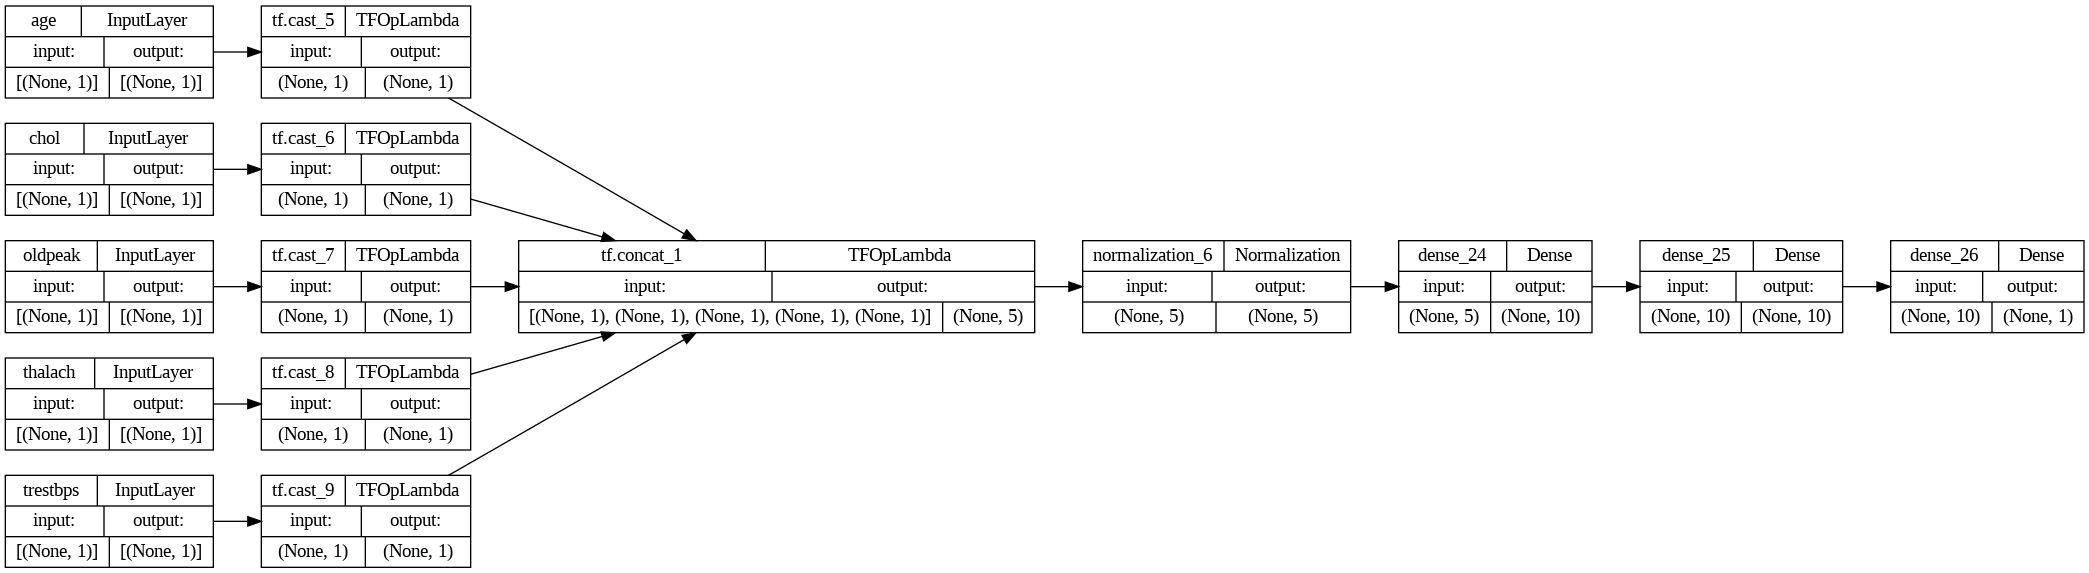

In [ ]:
tf.keras.utils.plot_model(model, rankdir="LR", show_shapes=True)

In [ ]:
model.fit(dict(numeric_features), target, epochs=5, batch_size=BATCH_SIZE)

Epoch 1/5
152/152 [==============================] - 7s 46ms/step - loss: 0.6432 - accuracy: 0.7261
Epoch 2/5
152/152 [==============================] - 6s 40ms/step - loss: 0.5436 - accuracy: 0.7261
Epoch 3/5
152/152 [==============================] - 9s 59ms/step - loss: 0.5079 - accuracy: 0.7261
Epoch 4/5
152/152 [==============================] - 8s 53ms/step - loss: 0.4937 - accuracy: 0.7261
Epoch 5/5
152/152 [==============================] - 6s 37ms/step - loss: 0.4803 - accuracy: 0.7261


In [ ]:
numeric_dict_batches = numeric_dict_batches.shuffle(SHUFFLE_BUFFER).batch(BATCH_SIZE)
model.fit(numeric_dict_batches, epochs=5)

Epoch 1/5


InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_6_device_/job:localhost/replica:0/task:0/device:CPU:0}} Cannot batch tensors with different shapes in component 0. First element had shape [1] and element 1 had shape [2]. [Op:IteratorGetNext] name: 

In [ ]:
binary_features_names = ['sex','fbs','exang']

In [ ]:
categorical_feature_names = ['cp', 'restecg', 'slope', 'thal', 'ca']


In [ ]:
inputs = {}
for name,column in df.items():
  if type(column[0]) == str:
    dtype = tf.string
  elif (name in binary_features_names or name in categorical_feature_names):
    dtype = tf.int32
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape = (), name = name, dtype = dtype)

In [ ]:
inputs

{'age': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'age')>,
 'sex': <KerasTensor: shape=(None,) dtype=int32 (created by layer 'sex')>,
 'cp': <KerasTensor: shape=(None,) dtype=int32 (created by layer 'cp')>,
 'trestbps': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'trestbps')>,
 'chol': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'chol')>,
 'fbs': <KerasTensor: shape=(None,) dtype=int32 (created by layer 'fbs')>,
 'restecg': <KerasTensor: shape=(None,) dtype=int32 (created by layer 'restecg')>,
 'thalach': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'thalach')>,
 'exang': <KerasTensor: shape=(None,) dtype=int32 (created by layer 'exang')>,
 'oldpeak': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'oldpeak')>,
 'slope': <KerasTensor: shape=(None,) dtype=int32 (created by layer 'slope')>,
 'ca': <KerasTensor: shape=(None,) dtype=int32 (created by layer 'ca')>,
 'thal': <KerasTensor: shape=(None,) dtype=string 

In [ ]:
preprocessed = []

for name in binary_features_names:
  inp = inputs[name]
  inp = inp[:,tf.newaxis]
  float_value = tf.cast(inp, tf.float32)

  preprocessed.append(float_value)

preprocessed

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_27')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_28')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_29')>]

In [ ]:
normalizer = tf.keras.layers.Normalization(axis = -1)
normalizer.adapt(stack_dict(dict(numeric_features)))

In [ ]:
numeric_inputs = {}

for name in numeric_features_names:
  numeric_inputs[name] = inputs[name]

numeric_inputs = stack_dict(numeric_inputs)
numeric_normalized = normalizer(numeric_inputs)
preprocessed.append(numeric_normalized)

preprocessed

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_27')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_28')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_29')>,
 <KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'normalization_9')>]

In [ ]:
vocab = ['a','b','c']
lookup = tf.keras.layers.StringLookup(vocabulary=vocab, output_mode='one_hot')
lookup(['c','a','a','b','zzz'])

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]], dtype=float32)>

In [ ]:
vocab = [1,4,7,99]
lookup = tf.keras.layers.IntegerLookup(vocabulary=vocab, output_mode='one_hot')

lookup([-1,4,1])

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)>

In [ ]:
for name in categorical_feature_names:
  vocab = sorted(set(df[name]))
  print(f'name: {name}')
  print(f'vocab: {vocab}\n')

  if type(vocab[0]) is str:
    lookup = tf.keras.layers.StringLookup(vocabulary=vocab, output_mode='one_hot')
  else:
    print('here')
    lookup = tf.keras.layers.IntegerLookup(vocabulary=vocab, output_mode='one_hot')

  x = inputs[name][:, tf.newaxis]
  x = lookup(x)
  preprocessed.append(x)

name: cp
vocab: [0, 1, 2, 3, 4]

here
name: restecg
vocab: [0, 1, 2]

here
name: slope
vocab: [1, 2, 3]

here
name: thal
vocab: ['1', '2', 'fixed', 'normal', 'reversible']

name: ca
vocab: [0, 1, 2, 3]

here


In [ ]:
preprocessed

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_27')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_28')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_29')>,
 <KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'normalization_9')>,
 <KerasTensor: shape=(None, 6) dtype=float32 (created by layer 'integer_lookup_6')>,
 <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'integer_lookup_7')>,
 <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'integer_lookup_8')>,
 <KerasTensor: shape=(None, 6) dtype=float32 (created by layer 'string_lookup_1')>,
 <KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'integer_lookup_9')>]

In [ ]:
preprocessed_result = tf.concat(preprocessed, axis = -1)

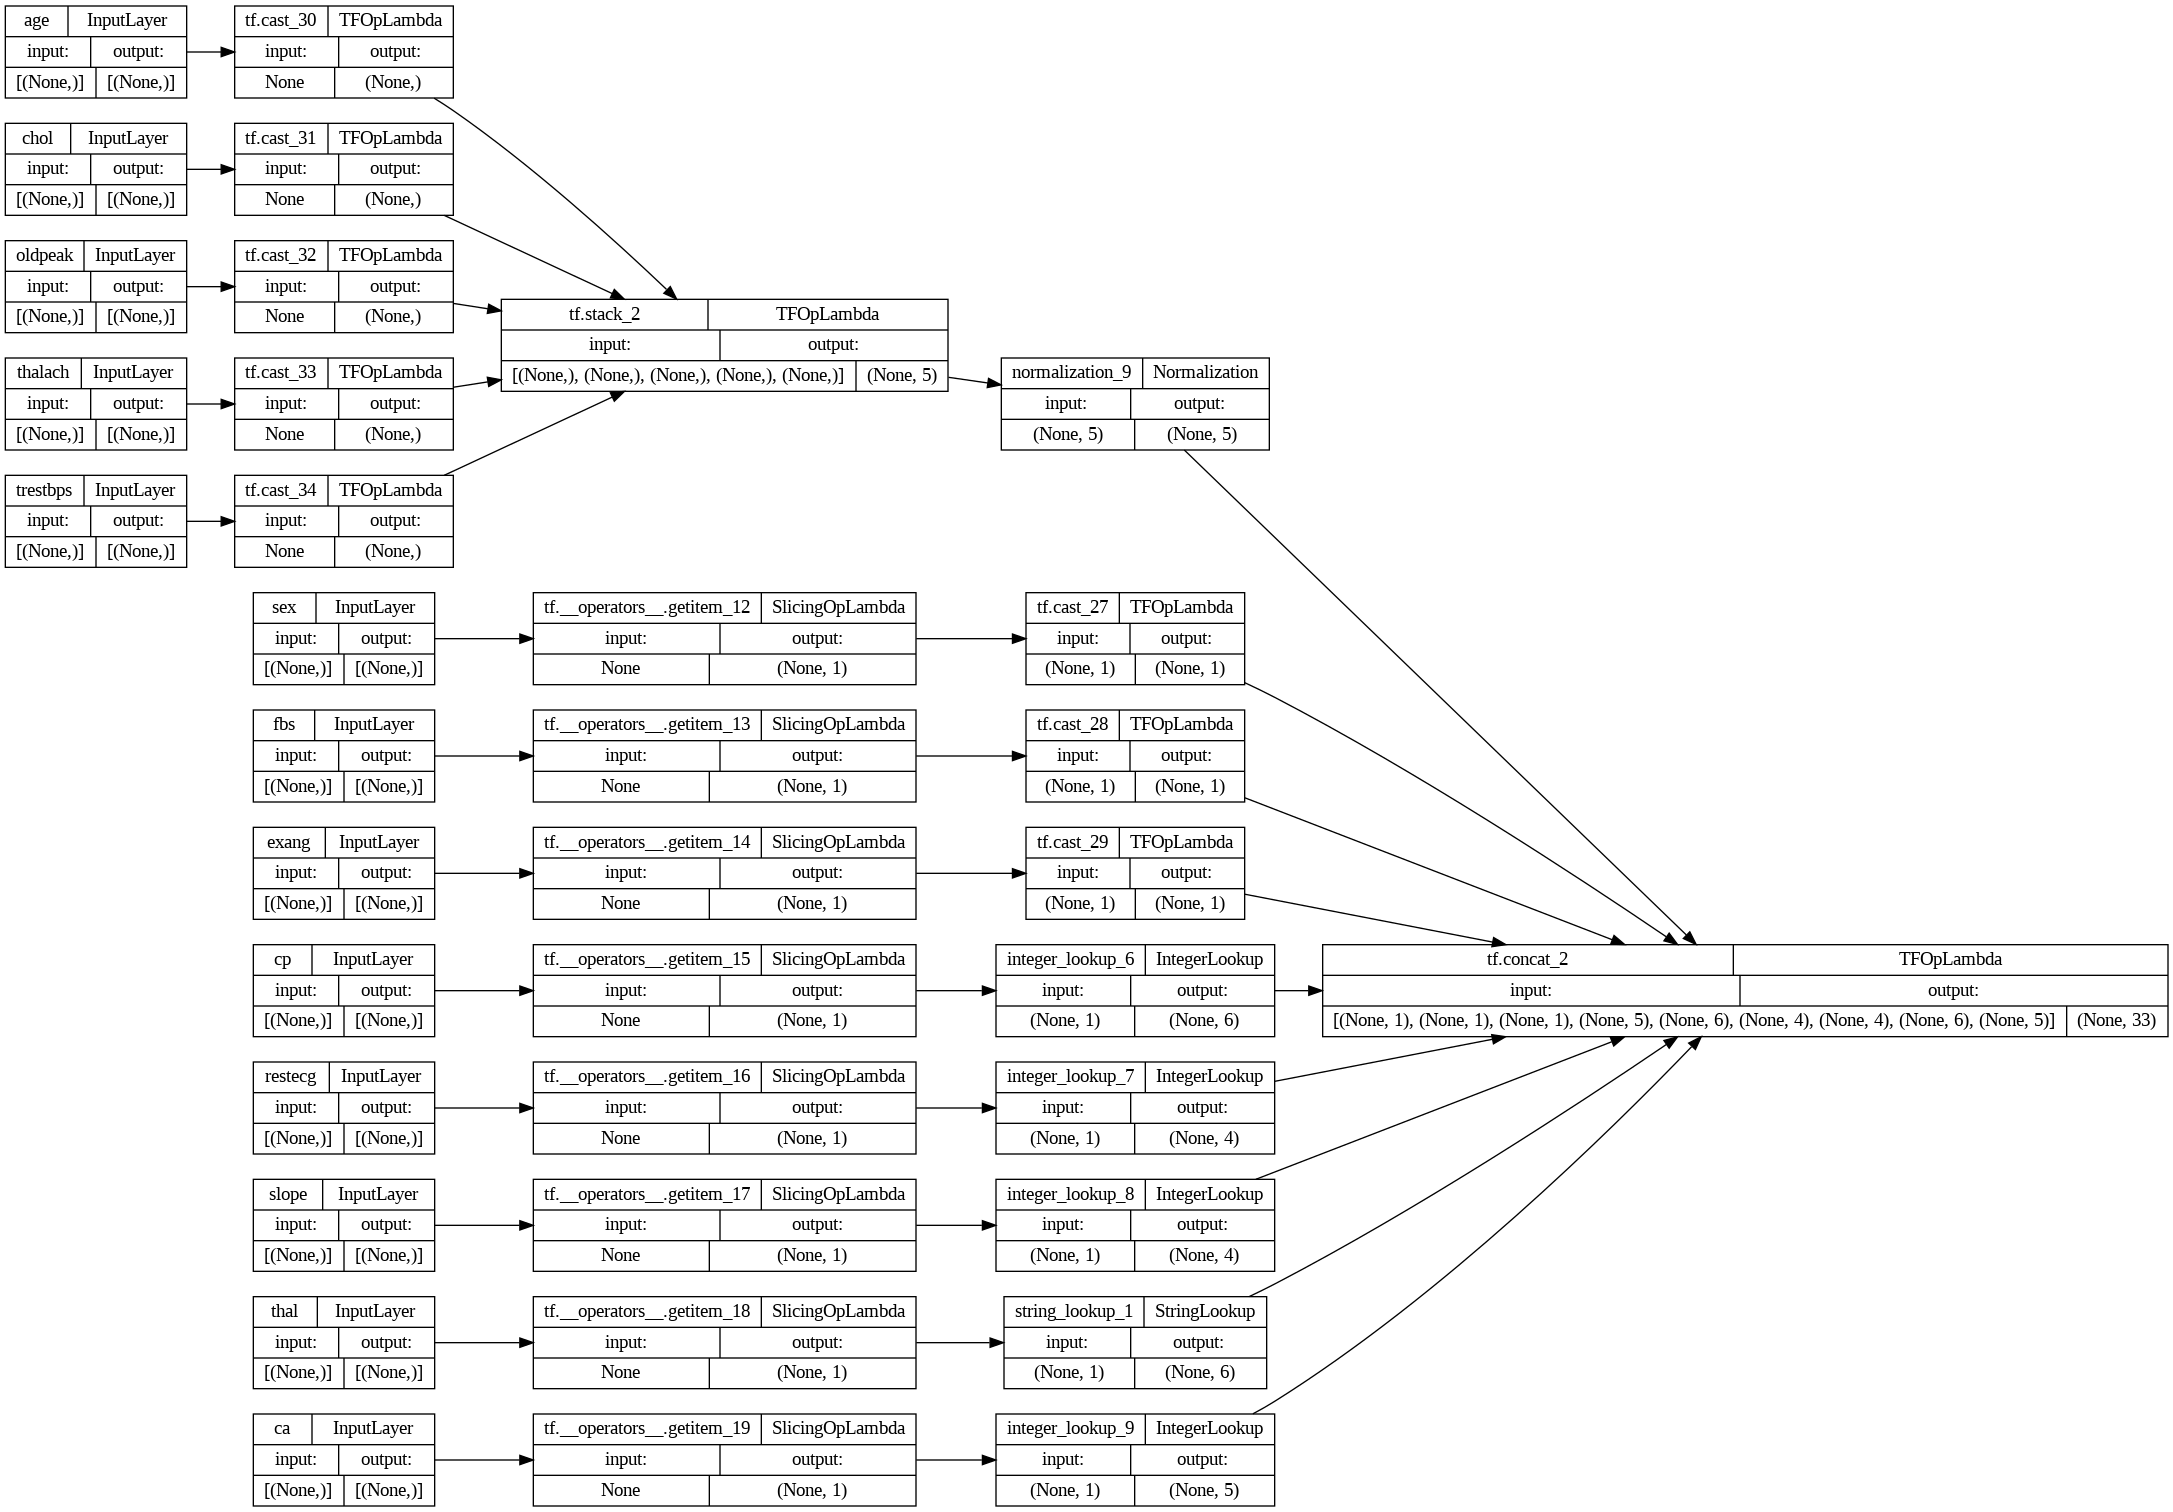

In [ ]:
preprocessor = tf.keras.Model(inputs, preprocessed_result)
tf.keras.utils.plot_model(preprocessor, rankdir = 'LR', show_shapes= True)

In [ ]:
preprocessor(dict(df.iloc[:1]))

<tf.Tensor: shape=(1, 33), dtype=float32, numpy=
array([[ 1.        ,  1.        ,  0.        ,  0.93383914, -0.2600867 ,
         1.0680453 ,  0.03480718,  0.74578077,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ]], dtype=float32)>

In [ ]:
body = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1)
])

In [ ]:
x = preprocessor(inputs)
x


<KerasTensor: shape=(None, 33) dtype=float32 (created by layer 'model_4')>

In [ ]:
result = body(x)
result

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'sequential_7')>

In [ ]:
model = tf.keras.Model(inputs, result)

model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [ ]:
history = model.fit(dict(df), target, epochs=5, batch_size=BATCH_SIZE)

Epoch 1/5
152/152 [==============================] - 3s 3ms/step - loss: 0.6261 - accuracy: 0.7261
Epoch 2/5
152/152 [==============================] - 1s 4ms/step - loss: 0.4982 - accuracy: 0.7228
Epoch 3/5
152/152 [==============================] - 1s 4ms/step - loss: 0.4080 - accuracy: 0.7459
Epoch 4/5
152/152 [==============================] - 0s 3ms/step - loss: 0.3577 - accuracy: 0.7789
Epoch 5/5
152/152 [==============================] - 0s 2ms/step - loss: 0.3276 - accuracy: 0.8284
